# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing dataset

In [2]:
dataset=pd.read_csv("Churn_Modelling.csv")
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# DATA EXPLORING

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


# Analysing and cleaning the data

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
dataset.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In the Telecom Churn dataset customerId,Rownumber ,Surname features as they will not help us in model building

In [7]:
dataset.drop(['Surname','RowNumber','CustomerId'],inplace=True,axis=1)
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
dataset.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Describing a dataset gives the full information of the columns

In [9]:
dataset['Exited'].describe()

count    10000.000000
mean         0.203700
std          0.402769
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Exited, dtype: float64

# Data Visualisation

In [10]:
import seaborn as sns

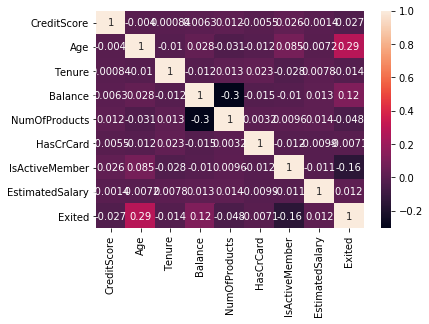

In [11]:
sns.heatmap(dataset.corr(),annot=True)

# Numerical Features

Text(0, 0.5, 'Estimated Salary')

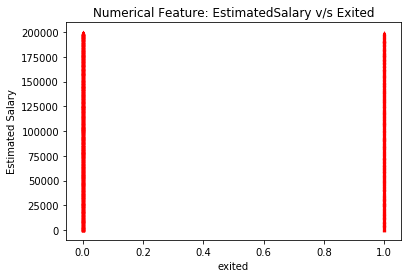

In [12]:
plt.scatter(dataset['Exited'],dataset['EstimatedSalary'],s=10,alpha=0.5,linewidths=0.1,marker='^',color='red')
plt.title('Numerical Feature: EstimatedSalary v/s Exited')
plt.xlabel('exited')
plt.ylabel('Estimated Salary')

# Coming to Categorial Features

Text(0, 0.5, 'Exited')

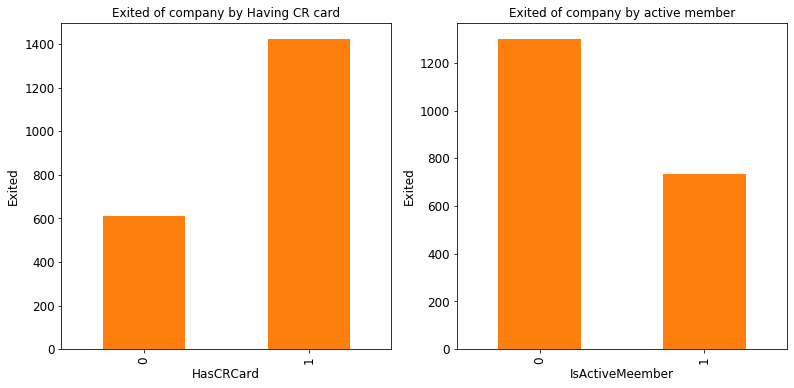

In [13]:
f,  (ax1, ax2)  =  plt.subplots(nrows=1, ncols=2, figsize=(13, 6))

ax1 = dataset[['HasCrCard','Exited']].groupby(['HasCrCard']).sum().reset_index().plot(kind='bar',
                                       legend = False, title ="Exited of company by Having CR card", 
                                         stacked=True, fontsize=12, ax=ax1)
ax1.set_xlabel("HasCRCard", fontsize=12)
ax1.set_ylabel("Exited", fontsize=12)


 
ax2 = dataset[['IsActiveMember','Exited']].groupby(['IsActiveMember']).sum().reset_index().plot(kind='bar',  
      legend = False, stacked=True, title ="Exited of company by active member", fontsize=12, ax=ax2)

ax2.set_xlabel("IsActiveMeember", fontsize=12)
ax2.set_ylabel("Exited", fontsize=12)




# Separating independent and dependent variables

In [14]:
x=dataset.iloc[:,:10].values
x

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [15]:
x.shape

(10000, 10)

In [16]:
y=dataset.iloc[:,10:].values
y

array([[1],
       [0],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int64)

In [17]:
y.shape

(10000, 1)

# Encoding categorical text variables(columns)

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:,1] = le.fit_transform(x[:,1])

In [19]:
x

array([[619, 0, 'Female', ..., 1, 1, 101348.88],
       [608, 2, 'Female', ..., 0, 1, 112542.58],
       [502, 0, 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 0, 'Female', ..., 0, 1, 42085.58],
       [772, 1, 'Male', ..., 1, 0, 92888.52],
       [792, 0, 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [20]:
le

LabelEncoder()

In [21]:
x[:,2] = le.fit_transform(x[:,2])

In [22]:
x

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [23]:
from joblib import dump
dump(le,'labelencoder.save')

['labelencoder.save']

Using of label encoder converts text to numeric so that , It is handle the model buliding

# Training and Testing the model

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [26]:
x_train

array([[641, 0, 1, ..., 1, 1, 55796.83],
       [541, 0, 1, ..., 1, 0, 19823.02],
       [590, 0, 0, ..., 0, 1, 13848.58],
       ...,
       [738, 0, 1, ..., 1, 0, 181429.87],
       [590, 2, 0, ..., 1, 1, 148750.16],
       [623, 1, 0, ..., 1, 0, 118855.26]], dtype=object)

In [27]:
y_train

array([[1],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]], dtype=int64)

In [28]:
x_test.shape

(3000, 10)

In [29]:
y_test.shape

(3000, 1)

# Researching the model that will be best for the type of data

As the depedent variable is categorical so, we have to use classification techniques

We have Logistic Regression , DecisionTreeClassification , Random Forest ,Naive bayes

We have to find the best technique by using accuracy score

For which accuracy is more that is the best technique for this telecom churn dataset

# Decision Tree Classification

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier(criterion='entropy',random_state=0)

In [31]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [32]:
y_pred=dt.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.803

In [34]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.708003606435538

# random forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)

In [36]:
rf.fit(x_train,y_train)

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [37]:
x_test.shape

(3000, 10)

In [38]:
import pickle
pickle.dump(rf,open('randomforest.pkl','wb'))

In [39]:
y_predict=rf.predict([[771,0,1,39,5,0.00,2,1,0,962270.64]])
y_predict

array([0], dtype=int64)

In [40]:
y_pred=rf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.867

In [42]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.729912296198825

# logistic regression


In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_pred=model.predict(x_test)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.784

In [45]:
import sklearn.metrics as metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)
roc_auc

0.5157446497432242

# Here the accuracy of the model is high in Random forest so Random Forest is the Best type of model fitting.